## Plots figure 5 and 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
plt.rcParams['text.usetex'] = True
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from plots_functions import *

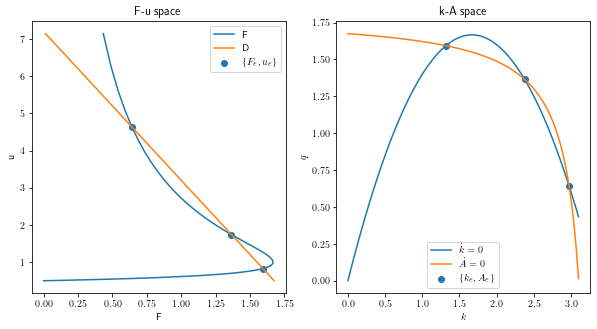

In [2]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
karr = np.linspace(0.0,3.1,100)
uarr = μ(karr)
ax[0].plot(f(karr),uarr, label = r'F')
ax[0].plot(D(uarr),uarr, label = r'D')
ax[0].set(title = 'F-u space', xlabel = 'F', ylabel = 'u')
ax[1].plot(karr, f(karr), label = r'$\dot{k} = 0$')
ax[1].plot(karr, D(uarr), label = r'$\dot{A} = 0$')
ax[1].set(title = 'k-A space', xlabel = r'$k$', ylabel = r'$q$')
fig.show()

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])
ax[0].scatter(f(keq),μ(keq), label = r'$\{F_{e}, u_{e}\}$')
ax[0].legend()
ax[1].scatter(keq, f(keq), label = r'$\{k_{e}, A_{e}\}$')
ax[1].legend()

### Define the rules of motion

In [3]:
θ = -ω*(-keq[2]*γ + v(keq[2])) + 0.5
def dx_dt(x,t,θ):
    k,A = x
    dk = A - f(k)
    dA = θ*(d(A) - μ(k))
    if dk < 0 and k < 0.01:
        dk = 0.0
    if dA < 0 and A < 0.01:
        dA = 0.0 
    return [dk, dA]

### Figure 5

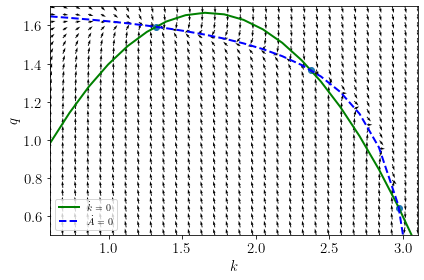

In [4]:
kmin,kmax = 0.6, 3.1
Amin, Amax = 0.5, 1.7
karr = np.linspace(kmin,kmax,20)
Aarr = np.linspace(Amin,Amax,20)
ts = np.linspace(0,30,500)
for k in karr:
    for A in Aarr:
        x0 = [k,A]
        xs = odeint(dx_dt,x0,ts, args=(θ,))
        plt.plot(xs[:,0],xs[:,1],'r-')
plt.cla()        
plt.xlabel(r'$k$', fontsize=15)
plt.ylabel(r'$q$', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(kmin, kmax)
plt.ylim(Amin, Amax)
ks=np.linspace(0,kmax,50)
plt.plot(karr,f(karr),'g-',lw=2, label = r'$\dot{k} = 0$')
plt.plot(karr,D(μ(karr)),ls='--',color='blue',lw=2, label = r'$\dot{A} = 0$')

K, A = np.mgrid[kmin:kmax:30j, Amin:Amax:30j]
kt = A - f(K)
ut = θ*(d(A)-μ(K))
r = np.power(np.add(np.power(kt,2), np.power(ut,2)),0.5)
plt.quiver(K, A, kt/r, ut/r, color='k', angles='xy', scale_units='xy')
plt.scatter(keq, f(keq))
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig("../../fig/kA_model/grad.pdf")

# Only flow perturbation

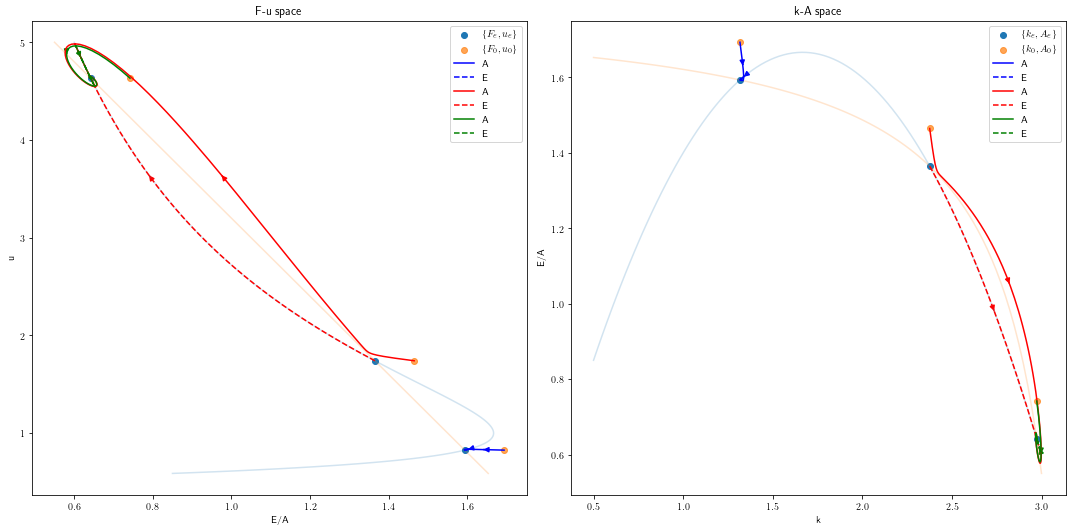

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,7.5))
karr = np.linspace(0.5,3,100)
uarr = μ(karr)
ax[0].plot(f(karr),uarr,  alpha = 0.2)
ax[0].plot(D(uarr),uarr, alpha = 0.2)
ax[0].set(title = 'F-u space', xlabel = 'E/A', ylabel = 'u')
ax[1].plot(karr, f(karr), alpha = 0.2)
ax[1].plot(karr, D(uarr), alpha = 0.2)
ax[1].set(title = 'k-A space', xlabel = 'k', ylabel = 'E/A')
fig.show()

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])
ax[0].scatter(f(keq),μ(keq), label = r'$\{F_{e}, u_{e}\}$')
# ax[0].legend()
ax[1].scatter(keq, f(keq), label = r'$\{k_{e}, A_{e}\}$')
# ax[1].legend()

kreq = keq
Areq = f(keq)+0.1
ax[0].scatter(Areq,μ(kreq), label = r'$\{F_{0}, u_{0}\}$', alpha = 0.7)
ax[1].scatter(kreq, Areq, label = r'$\{k_{0}, A_{0}\}$', alpha = 0.7)
ts = np.linspace(0,30,500)
for (i, k) in enumerate(kreq):
    x0 = [k,Areq[i]]
    xs = odeint(dx_dt,x0,ts, args=(θ,))
    cs = ['blue','red','green','black','orange','purple']
    line1, = ax[0].plot(xs[:,1],μ(xs[:,0]), label = r'A', color = cs[i], ls = '-')
    line2, = ax[0].plot(f(xs[:,0]),μ(xs[:,0]), label = r'E', color = cs[i], ls = '--')
    line3, = ax[1].plot(xs[:,0],xs[:,1], color = cs[i], label = r'A')
    line4, = ax[1].plot(xs[:,0],f(xs[:,0]), color = cs[i], label = r'E', ls = '--')
    add_arrow_to_line2D(ax[0], line = line1)
    add_arrow_to_line2D(ax[0], line = line2)
    add_arrow_to_line2D(ax[1], line = line3)
    add_arrow_to_line2D(ax[1], line = line4)
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()

### Zoomed in on stable hypercongested equilibrium 

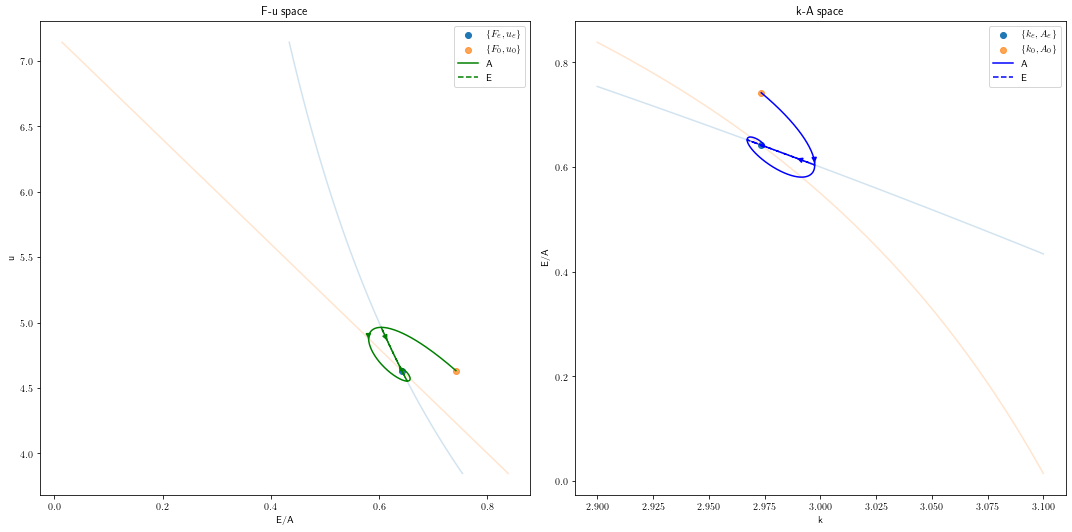

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,7.5))
karr = np.linspace(2.9,3.1,100)
uarr = μ(karr)
ax[0].plot(f(karr),uarr,  alpha = 0.2)
ax[0].plot(D(uarr),uarr, alpha = 0.2)
ax[0].set(title = 'F-u space', xlabel = 'E/A', ylabel = 'u')
ax[1].plot(karr, f(karr), alpha = 0.2)
ax[1].plot(karr, D(uarr), alpha = 0.2)
ax[1].set(title = 'k-A space', xlabel = 'k', ylabel = 'E/A')
fig.show()

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])
ax[0].scatter(f(keq[2]),μ(keq[2]), label = r'$\{F_{e}, u_{e}\}$')
# ax[0].legend()
ax[1].scatter(keq[2], f(keq[2]), label = r'$\{k_{e}, A_{e}\}$')
# ax[1].legend()

kreq = [keq[2]]
Areq = [f(keq[2])+0.1]
ax[0].scatter(Areq,μ(kreq), label = r'$\{F_{0}, u_{0}\}$', alpha = 0.7)
ax[1].scatter(kreq, Areq, label = r'$\{k_{0}, A_{0}\}$', alpha = 0.7)

ts = np.linspace(0,5,500)
for (i, kk) in enumerate(kreq):
    aa = Areq[i]
    x0 = [kk,aa]
    xs = odeint(dx_dt,x0,ts, args=(θ,))
    # cs = ['blue','red','green','black','orange','purple']
    line1, = ax[0].plot(xs[:,1],μ(xs[:,0]), label = r'A', color = 'green', ls = '-')
    line2, = ax[0].plot(f(xs[:,0]),μ(xs[:,0]), label = r'E', color = 'green', ls = '--')
    line3, = ax[1].plot(xs[:,0],xs[:,1], color = cs[i], label = r'A')
    line4, = ax[1].plot(xs[:,0], f(xs[:,0]), color = cs[i], ls = '--', label = r'E')
    add_arrow_to_line2D(ax[0], line = line1)
    add_arrow_to_line2D(ax[0], line = line2)
    add_arrow_to_line2D(ax[1], line = line3)
    add_arrow_to_line2D(ax[1], line = line4)
ax[0].legend()
ax[1].legend()
fig.tight_layout()

# Density Perturbation

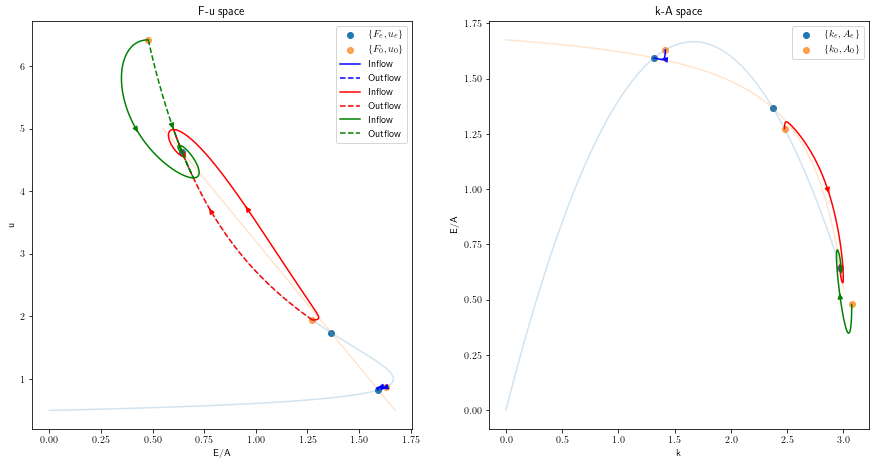

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,7.5))
karr = np.linspace(0.0,3,100)
uarr = μ(karr)
ax[0].plot(f(karr),uarr,  alpha = 0.2)
ax[0].plot(D(uarr),uarr, alpha = 0.2)
ax[0].set(title = 'F-u space', xlabel = 'E/A', ylabel = 'u')
ax[1].plot(karr, f(karr), alpha = 0.2)
ax[1].plot(karr, D(uarr), alpha = 0.2)
ax[1].set(title = 'k-A space', xlabel = 'k', ylabel = 'E/A')
fig.show()

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])
ax[0].scatter(f(keq),μ(keq), label = r'$\{F_{e}, u_{e}\}$')
ax[1].scatter(keq, f(keq), label = r'$\{k_{e}, A_{e}\}$')

kreq = keq+0.1
Areq = f(kreq)
ax[0].scatter(Areq,μ(kreq), label = r'$\{F_{0}, u_{0}\}$', alpha = 0.7)
ax[1].scatter(kreq, Areq, label = r'$\{k_{0}, A_{0}\}$', alpha = 0.7)
ts = np.linspace(0,10,500)
for (i, k) in enumerate(kreq):
    x0 = [k,Areq[i]]
    xs = odeint(dx_dt,x0,ts, args=(θ,))
    cs = ['blue','red','green','black','orange','purple']
    line1, = ax[0].plot(xs[:,1],μ(xs[:,0]), label = r'Inflow', color = cs[i], ls = '-')
    line2, = ax[0].plot(f(xs[:,0]),μ(xs[:,0]), label = r'Outflow', color = cs[i], ls = '--')
    line3, = ax[1].plot(xs[:,0],xs[:,1], color = cs[i])
    add_arrow_to_line2D(ax[0], line = line1)
    add_arrow_to_line2D(ax[0], line = line2)
    add_arrow_to_line2D(ax[1], line = line3)
    ax[0].legend()
    ax[1].legend()

### Zoomed in on stable hypercongested equilibrium

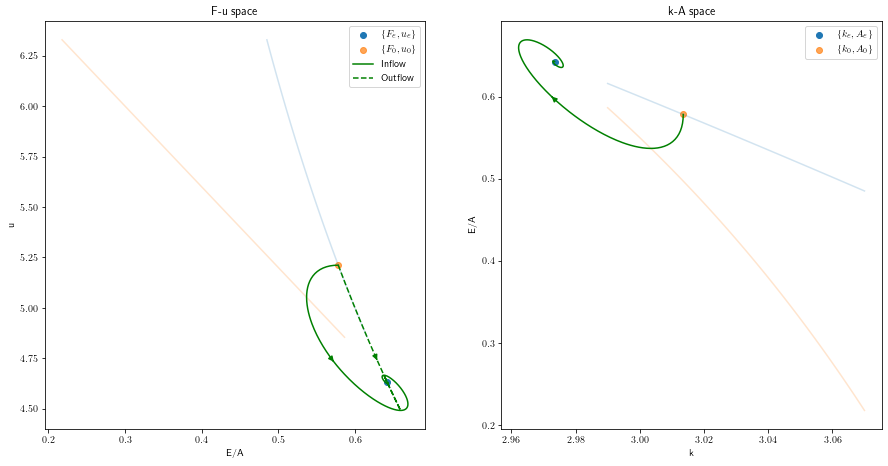

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,7.5))
karr = np.linspace(2.99,3.07,100)
uarr = μ(karr)
ax[0].plot(f(karr),uarr,  alpha = 0.2)
ax[0].plot(D(uarr),uarr, alpha = 0.2)
ax[0].set(title = 'F-u space', xlabel = 'E/A', ylabel = 'u')
ax[1].plot(karr, f(karr), alpha = 0.2)
ax[1].plot(karr, D(uarr), alpha = 0.2)
ax[1].set(title = 'k-A space', xlabel = 'k', ylabel = 'E/A')
fig.show()

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])
ax[0].scatter(f(keq[2]),μ(keq[2]), label = r'$\{F_{e}, u_{e}\}$')
# ax[0].legend()
ax[1].scatter(keq[2], f(keq[2]), label = r'$\{k_{e}, A_{e}\}$')
# ax[1].legend()

kreq = keq[2]+0.04
Areq = f(kreq)
ax[0].scatter(Areq,μ(kreq), label = r'$\{F_{0}, u_{0}\}$', alpha = 0.7)
ax[1].scatter(kreq, Areq, label = r'$\{k_{0}, A_{0}\}$', alpha = 0.7)

ts = np.linspace(0,5,500)
x0 = [kreq,Areq]
xs = odeint(dx_dt,x0,ts, args=(θ,))
# cs = ['blue','red','green','black','orange','purple']
line1, = ax[0].plot(xs[:,1],μ(xs[:,0]), label = r'Inflow', color = 'green', ls = '-')
line2, = ax[0].plot(f(xs[:,0]),μ(xs[:,0]), label = r'Outflow', color = 'green', ls = '--')
line3, = ax[1].plot(xs[:,0],xs[:,1], color = cs[i])
add_arrow_to_line2D(ax[0], line = line1)
add_arrow_to_line2D(ax[0], line = line2)
add_arrow_to_line2D(ax[1], line = line3)
ax[0].legend()
ax[1].legend()

# Hypercongested unstable 

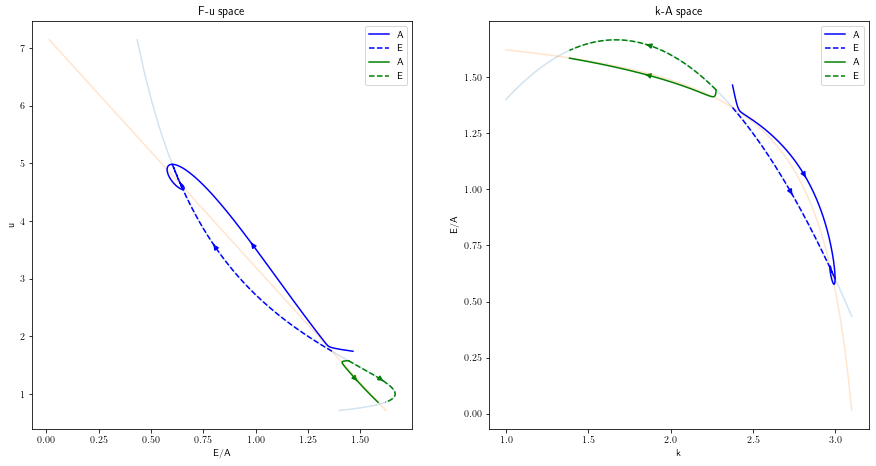

In [9]:

fig, ax = plt.subplots(1,2,figsize=(15,7.5))
karr = np.linspace(1.,3.1,100)
uarr = μ(karr)
ax[0].plot(f(karr),uarr,  alpha = 0.2)
ax[0].plot(D(uarr),uarr, alpha = 0.2)
ax[0].set(title = 'F-u space', xlabel = 'E/A', ylabel = 'u')
ax[1].plot(karr, f(karr), alpha = 0.2)
ax[1].plot(karr, D(uarr), alpha = 0.2)
ax[1].set(title = 'k-A space', xlabel = 'k', ylabel = 'E/A')
fig.show()

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])

kreq = [keq[1]]
Areq = [f(keq[1])+0.1]
ts = np.linspace(0,10,500)
for (i, k) in enumerate(kreq):
    x0 = [k,Areq[i]]
    xs = odeint(dx_dt,x0,ts, args=(θ,))
    cs = ['blue','red','green','black','orange','purple']
    line1, = ax[0].plot(xs[:,1],μ(xs[:,0]), label = r'A', color = cs[i], ls = '-')
    line2, = ax[0].plot(f(xs[:,0]),μ(xs[:,0]), label = r'E', color = cs[i], ls = '--')
    line3, = ax[1].plot(xs[:,0],xs[:,1], color = cs[i], label = r'A', ls = '-')
    line4, = ax[1].plot(xs[:,0],f(xs[:,0]), color = cs[i], label = r'E', ls = '--')
    add_arrow_to_line2D(ax[0], line = line1)
    add_arrow_to_line2D(ax[0], line = line2)
    add_arrow_to_line2D(ax[1], line = line3)
    add_arrow_to_line2D(ax[1], line = line4)
    ax[0].legend()
    ax[1].legend()

kreq = [keq[1]-0.1]
Areq = [f(keq[1]-0.1)]
ts = np.linspace(0,10,500)
for (i, k) in enumerate(kreq):
    x0 = [k,Areq[i]]
    xs = odeint(dx_dt,x0,ts, args=(θ,))
    cs = ['green','black','orange','purple']
    line1, = ax[0].plot(xs[:,1],μ(xs[:,0]), label = r'A', color = cs[i], ls = '-')
    line2, = ax[0].plot(f(xs[:,0]),μ(xs[:,0]), label = r'E', color = cs[i], ls = '--')
    line3, = ax[1].plot(xs[:,0],xs[:,1], color = cs[i], label = r'A', ls = '-')
    line4, = ax[1].plot(xs[:,0],f(xs[:,0]), color = cs[i], label = r'E', ls = '--')
    add_arrow_to_line2D(ax[0], line = line1)
    add_arrow_to_line2D(ax[0], line = line2)
    add_arrow_to_line2D(ax[1], line = line3)
    add_arrow_to_line2D(ax[1], line = line4)
    ax[0].legend()
    ax[1].legend()

### Figure 6

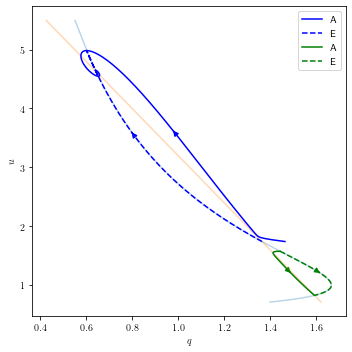

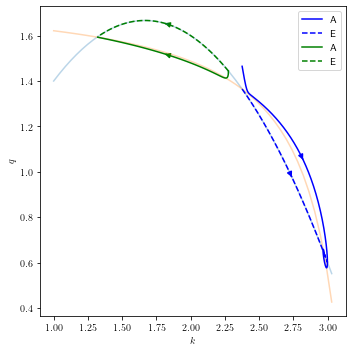

In [10]:

fig0, ax0 = plt.subplots(figsize=(5,5))
fig1, ax1 = plt.subplots(figsize=(5,5))
karr = np.linspace(1.,3.03,50)
uarr = μ(karr)
ax0.plot(f(karr),uarr,  alpha = 0.3)
ax0.plot(D(uarr),uarr, alpha = 0.3)
ax0.set(xlabel = r'$q$', ylabel = r'$u$')
ax1.plot(karr, f(karr), alpha = 0.3)
ax1.plot(karr, D(uarr), alpha = 0.3)
ax1.set(xlabel = r'$k$', ylabel = r'$q$')

keq = fsolve(lambda k: f(k) - D(μ(k)), [1., 2.5, 3.])

kreq = [keq[1]]
Areq = [f(keq[1])+0.1]
ts = np.linspace(0,10,500)
for (i, k) in enumerate(kreq):
    x0 = [k,Areq[i]]
    xs = odeint(dx_dt,x0,ts, args=(θ,))
    cs = ['blue','red','green','black','orange','purple']
    line1, = ax0.plot(xs[:,1],μ(xs[:,0]), label = r'A', color = cs[i], ls = '-')
    line2, = ax0.plot(f(xs[:,0]),μ(xs[:,0]), label = r'E', color = cs[i], ls = '--')
    line3, = ax1.plot(xs[:,0],xs[:,1], color = cs[i], label = r'A', ls = '-')
    line4, = ax1.plot(xs[:,0],f(xs[:,0]), color = cs[i], label = r'E', ls = '--')
    add_arrow_to_line2D(ax0, line = line1)
    add_arrow_to_line2D(ax0, line = line2)
    add_arrow_to_line2D(ax1, line = line3)
    add_arrow_to_line2D(ax1, line = line4)
    ax0.legend()
    ax1.legend()

kreq = [keq[1]-0.1]
Areq = [f(keq[1]-0.1)]
ts = np.linspace(0,15,100)
for (i, k) in enumerate(kreq):
    x0 = [k,Areq[i]]
    xs = odeint(dx_dt,x0,ts, args=(θ,))
    cs = ['green','black','orange','purple']
    line1, = ax0.plot(xs[:,1],μ(xs[:,0]), label = r'A', color = cs[i], ls = '-')
    line2, = ax0.plot(f(xs[:,0]),μ(xs[:,0]), label = r'E', color = cs[i], ls = '--')
    line3, = ax1.plot(xs[:,0],xs[:,1], color = cs[i], label = r'A', ls = '-')
    line4, = ax1.plot(xs[:,0],f(xs[:,0]), color = cs[i], label = r'E', ls = '--')
    add_arrow_to_line2D(ax0, line = line1)
    add_arrow_to_line2D(ax0, line = line2)
    add_arrow_to_line2D(ax1, line = line3)
    add_arrow_to_line2D(ax1, line = line4)
    ax0.legend()
    ax1.legend()
fig0.tight_layout()
fig1.tight_layout()

In [11]:
fig1.savefig('../../fig/kA_model/kQ-trajectory.pdf')
fig0.savefig('../../fig/kA_model/uQ-trajectory.pdf')